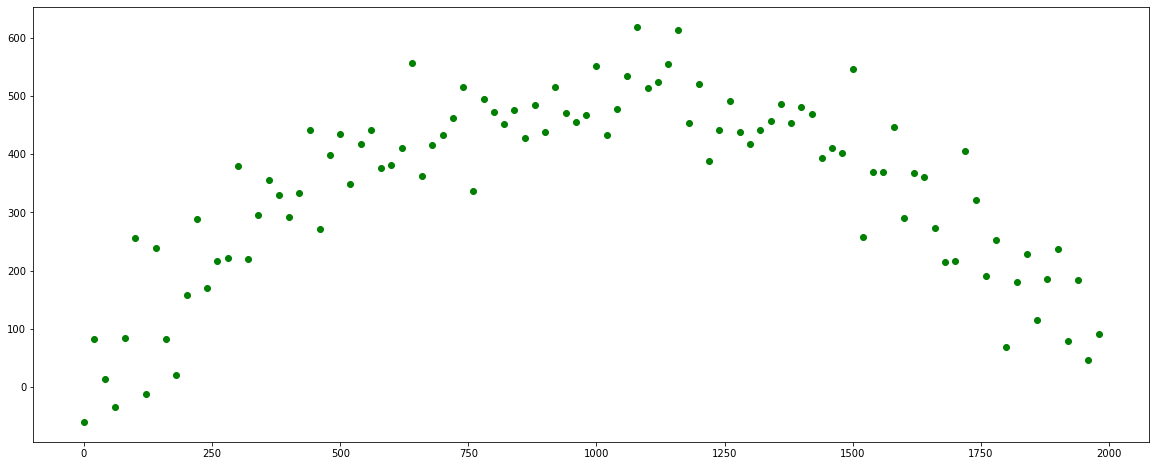

In [3]:
import numpy as np
from math import exp

no_of_points = 100
#the number of points at which to compute the trajectory
yground=0.0
#the y_coordinate of the ground
w=1
noise=60
#particle weight
h=0.1
#dragging
a=9.81
#deceleration
#primary  conditions
xp=100
#x primary velocity
yp=100
#y primary velocity

#functions
def xtrajec(t):
    return xp*t

def ytrajec(t):
    return yp*t-0.5*a*t**2

#main
#variable initialization
time=[]
x_coordinates=[]
y_coordinates=[]
t=0.0
dt=0.2

for i in range(no_of_points):
    x_coordinate=xtrajec(t)
    y_coordinate=ytrajec(t)
    time.append(t)
    if y_coordinate>=yground:
        x_coordinates.append(x_coordinate)
        y_coordinates.append(y_coordinate)
 #
    t=t+dt
param=len(y_coordinates)
y_coordinates=y_coordinates + np.random.normal(0, noise, param)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.scatter(x_coordinates,y_coordinates,color='green')
plt.show()

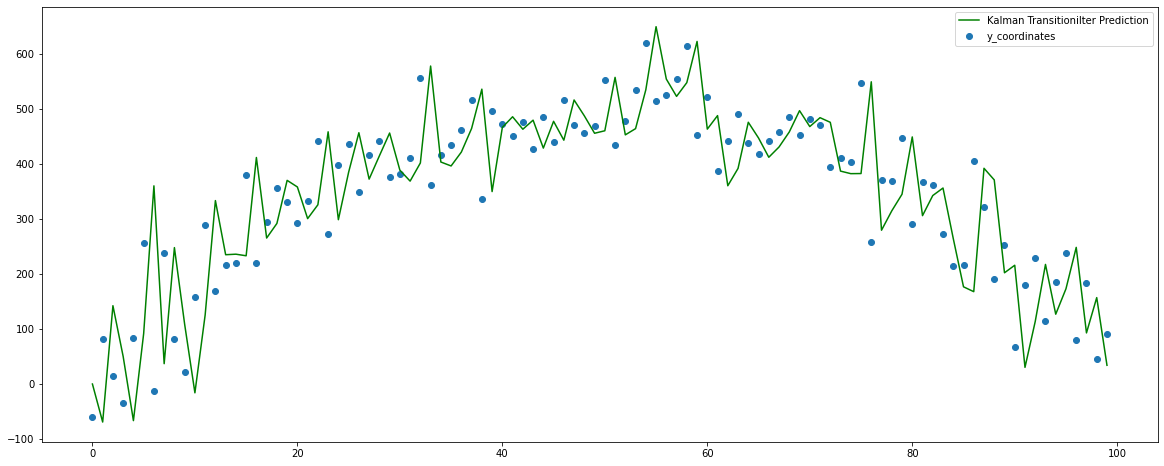

In [4]:

class KalmanFilter(object):
    def __init__(self, Transition, Observation = None, Q = None, R = None):
        self.n = Transition.shape[1]
        self.m = Observation.shape[1]
        self.Transition = Transition
        self.Observation = Observation
        self.B = 0 
        self.Q = Q
        self.R = R
        self.P = np.eye(self.n)
        self.state = np.zeros((self.n, 1))
    def predict(self, u = 0):
        self.state = np.dot(self.Transition, self.state) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.Transition, self.P), self.Transition.T) + self.Q
        return self.state
    def update(self, z):
        residual = z - np.dot(self.Observation, self.state)
        residualcovariance = self.R + np.dot(self.Observation, np.dot(self.P, self.Observation.T))
        K = np.dot(np.dot(self.P, self.Observation.T), np.linalg.inv(residualcovariance))
        self.state = self.state + np.dot(K, residual)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.Observation), self.P), 
        	(I - np.dot(K, self.Observation)).T) + np.dot(np.dot(K, self.R), K.T)


Transition = np.array([[1, 1, 0], [0, 1, 1], [0, 0, 1]])
Observation = np.array([1, 0, 0]).reshape(1, 3)
Q = np.array([[0.5, 0.5, 0.0], [0.5, 0.5, 0.0], [0.0, 0.0, 0.0]])
R = np.array([1]).reshape(1, 1)
kf = KalmanFilter(Transition = Transition, Observation = Observation, Q = Q, R = R)
predictions = []
for z in y_coordinates:
	predictions.append(np.dot(Observation,  kf.predict())[0])
	kf.update(z)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.scatter(range(len(y_coordinates)), y_coordinates, label = 'y_coordinates')
plt.plot(range(len(predictions)), np.array(predictions), label = 'Kalman Transitionilter Prediction',color='green')
plt.legend()
plt.show()



In [5]:
from sklearn.metrics import mean_squared_error
import math
error = math.sqrt(mean_squared_error(y_coordinates, predictions))
print(error)

111.25645596200165
